# **Processamento de Linguagem Natural Com Python**

### Bibliotecas

In [1]:
# Libs
import bs4 as bs
import urllib.request
import nltk
import spacy

### Marcação POS
POS (part-of-speech) atribui para as palavras partes da fala, como substantivos, adjetivos, verbos
Importante para a detecção de entidades no texto, pois primeiro é necessário saber o que o texto contém
Lista de tokens: https://spacy.io/api/annotation#pos-tagging
Português: https://www.sketchengine.eu/portuguese-freeling-part-of-speech-tagset/

In [2]:
# Carregando o spacy
spacy.prefer_gpu()
pln = spacy.load("pt_core_news_sm")
pln

In [3]:
# Verificando o funcionamento
doc = pln(
        'Estou aprendendo processamento de linguagem natural, no curso Inteligência Artificial e Machine Learning: O Guia Completo'
)
type(doc)

spacy.tokens.doc.Doc

In [4]:
# Iterando os tipos 
for token in doc:
    print(token.text, token.pos_)

Estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguagem NOUN
natural ADJ
, PUNCT
no ADP
curso NOUN
Inteligência PROPN
Artificial PROPN
e CCONJ
Machine PROPN
Learning PROPN
: PUNCT
O DET
Guia PROPN
Completo PROPN


### Lematização e stemização

In [5]:
# texto e lema
for token in doc:
    print(token.text, token.lemma_)

Estou estar
aprendendo aprender
processamento processamento
de de
linguagem linguagem
natural natural
, ,
no em o
curso curso
Inteligência Inteligência
Artificial Artificial
e e
Machine Machine
Learning Learning
: :
O o
Guia Guia
Completo Completo


In [6]:
# Baixando o arquivo necessário para a stemização
nltk.download('rslp')

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\joaoi\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [7]:
# Extraído o radical de uma palavra
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('aprendendo')

'aprend'

In [8]:
# Verificando a diferença 
for token in doc:
    print(token.text, token.lemma_, stemmer.stem(token.text))

Estou estar est
aprendendo aprender aprend
processamento processamento process
de de de
linguagem linguagem lingu
natural natural natur
, , ,
no em o no
curso curso curs
Inteligência Inteligência intelig
Artificial Artificial artific
e e e
Machine Machine machin
Learning Learning learning
: : :
O o o
Guia Guia gui
Completo Completo complet


### Carregamento dos textos

In [9]:
# base de dados
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')
dados = dados.read()
dados

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";(f

In [10]:
# Restruturado os dados
dados_html = bs.BeautifulSoup(dados, 'html.parser')
dados_html

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";(function(){var cookie=document.cookie.

In [11]:
# Extraindo as tag p
paragrafos = dados_html.find_all('p')
len(paragrafos)

109

In [12]:
# visualizando o texto
paragrafos[1].text

'É um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[3] É possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos para que no futuro possa agir de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capacidade de conseguir aplicar o raciocínio nas situações do nosso cotidiano).[3]\n'

In [13]:
# extraindo os texto 
conteudo = ''
for p in paragrafos:
    conteudo += p.text

In [14]:
# visualizando o texto completo
conteudo

'Na tecnologia, a Inteligência Artificial (de sigla: IA; do inglês: Artificial Intelligence, de sigla: AI) é a inteligência demonstrada por máquinas ao executar tarefas complexas associadas a seres inteligentes,[1] além de também ser um campo de estudo acadêmico,[2] no qual o principal objetivo é de executar funções de modo autônomo. \nÉ um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[3] É possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos para que no futuro possa agir de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capacidade de conseguir aplicar o raciocínio nas situações do nosso cotidiano).[3]\nO desenvolvimento da área de estudo começou logo após a Segunda Guer

In [15]:
# Transformando as letras em minusculas 
conteudo = conteudo.lower()
conteudo

'na tecnologia, a inteligência artificial (de sigla: ia; do inglês: artificial intelligence, de sigla: ai) é a inteligência demonstrada por máquinas ao executar tarefas complexas associadas a seres inteligentes,[1] além de também ser um campo de estudo acadêmico,[2] no qual o principal objetivo é de executar funções de modo autônomo. \né um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[3] é possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos para que no futuro possa agir de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capacidade de conseguir aplicar o raciocínio nas situações do nosso cotidiano).[3]\no desenvolvimento da área de estudo começou logo após a segunda guer

### Buscas em textos com spaCy

In [16]:
# termo da pesquisa 
string = 'turing'
token_pesquisa = pln(string)

In [17]:
# método de pesquisa
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, token_pesquisa)

In [18]:
# fazendo a busca e Exibir a pesquisa
from IPython.core.display import HTML
texto = ''
numero_palavras = 50
doc = pln(conteudo)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f"""<p><strong>Resultados encontrados:</strong> {len(matches)}</p>"""))
for i in matches:
    inicio = i[1] - numero_palavras
    if inicio < 0:
        inicio = 0
    texto += str(doc[inicio:i[2] + numero_palavras]).replace(string, f"<mark>{string}</mark>")
    texto += "<br /><br />"
display(HTML(f"""... {texto} ... """))

### Extração de entidades nomeadas
- NER (Named-Entity Recognition)
- Encontrar e classificar entidades no texto, dependendo da base de dados que foi utilizada para o treinamento (pessoa, localização, empresa, numéricos)
- Usado em chatbots para saber o assunto falado
- Siglas: https://spacy.io/api/annotation#named-entities

In [19]:
# Encontrando e classificando
for entidade in doc.ents:
    print(entidade.text, entidade.label_)

cotidiano).[3 LOC
segunda guerra mundial MISC
computing machinery and intelligence MISC
alan turing,[4 PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
frankenstein MISC
prolog MISC
google ORG
wikipédia MISC
john mccarthy PER
aristóteles PER
alexandre PER
herbert simon PER
john mccarthy PER
brasil LOC
allen newell PER
herbert simon PER
mccarty PER
marvin minsky PER
mit ORG
darthmouth LOC
estados unidos LOC
fifth generation MISC
japão LOC
andreas kaplan PER
michael haenlein definem PER
john mccarthy PER
john haugeland PER
good PER
w. grey walter PER
besta de johns hopkins ORG
universidade de princeton LOC
ratio club LOC
inglaterra LOC
david rumelhart PER
isaac asimov PER
steven spielberg PER
stephen hawking PER
alan turing PER
turing PER
turing PER
turing PER
turing PER
turing PER
joseph weizenbaum PER
mit ORG
a.l.i.c.e MISC
java MISC
intelligence markup language PER
alicebots LOC
john searle PER
hubert dreyfus PER
searle P

In [20]:
# Visualizando em forma visual
from spacy import  displacy
displacy.render(doc, style='ent', jupyter=True)

### Nuvem de Palavras e stop words

#### Bibliotecas

In [21]:
# Libs
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from wordcloud import WordCloud

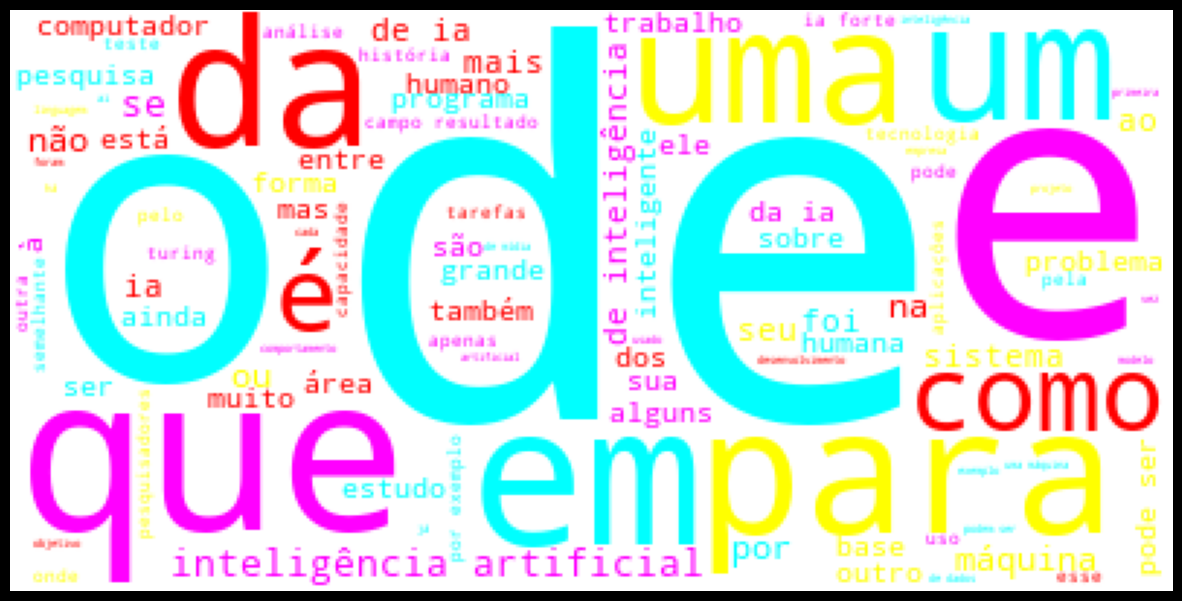

In [22]:
# configurando as cores
color_map = ListedColormap(['cyan', 'yellow', 'red', 'magenta'])
# configurando a nuvem
cloud = WordCloud(background_color='white', max_words=100, colormap=color_map)
# Visualizando
cloud = cloud.generate(conteudo)
plt.figure(figsize=(15, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [23]:
# aplicando os Stop Words
from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)

{'qual', 'ser', 'pois', 'depois', 'fazeis', 'esteve', 'também', 'tiveste', 'posição', 'querem', 'área', 'nunca', 'desde', 'cima', 'quer', 'cuja', 'vais', 'estiveram', 'vocês', 'o', 'fez', 'temos', 'tendes', 'relação', 'elas', 'porque', 'ao', 'suas', 'vinte', 'obrigado', 'vai', 'obrigada', 'minha', 'têm', 'maior', 'oito', 'nove', 'atrás', 'assim', 'vens', 'cedo', 'catorze', 'outros', 'muito', 'naquele', 'tanto', 'antes', 'maiorias', 'estivemos', 'pouco', 'esse', 'ele', 'seria', 'maioria', 'terceira', 'embora', 'ademais', 'sois', 'põem', 'conhecido', 'ver', 'próxima', 'tipo', 'faço', 'algumas', 'dizem', 'tem', 'sétima', 'estará', 'vêm', 'estava', 'poderá', 'num', 'nosso', 'somente', 'um', 'não', 'nas', 'meu', 'sem', 'novas', 'pôde', 'teve', 'ir', 'ou', 'talvez', 'terceiro', 'fazemos', 'conhecida', 'logo', 'toda', 'tenho', 'estão', 'está', 'mais', 'que', 'ainda', 'lá', 'nossa', 'demais', 'cinco', 'meus', 'naquela', 'apenas', 'tive', 'aquele', 'contudo', 'sistema', 'era', 'vosso', 'então',

In [24]:
# Separando o texto
doc = pln(conteudo)
lista_token = []
for token in doc:
    lista_token.append(token.text)
print(lista_token)

['na', 'tecnologia', ',', 'a', 'inteligência', 'artificial', '(', 'de', 'sigla', ':', 'ia', ';', 'do', 'inglês', ':', 'artificial', 'intelligence', ',', 'de', 'sigla', ':', 'ai', ')', 'é', 'a', 'inteligência', 'demonstrada', 'por', 'máquinas', 'ao', 'executar', 'tarefas', 'complexas', 'associadas', 'a', 'seres', 'inteligentes,[1', ']', 'além', 'de', 'também', 'ser', 'um', 'campo', 'de', 'estudo', 'acadêmico,[2', ']', 'no', 'qual', 'o', 'principal', 'objetivo', 'é', 'de', 'executar', 'funções', 'de', 'modo', 'autônomo', '.', '\n', 'é', 'um', 'conceito', 'amplo', 'e', 'que', 'recebe', 'tantas', 'definições', 'quanto', 'significados', 'diferentes', 'à', 'palavra', 'inteligência.[3', ']', 'é', 'possível', 'considerar', 'algumas', 'características', 'básicas', 'desses', 'sistemas', ',', 'como', 'a', 'capacidade', 'de', 'raciocínio', '(', 'aplicar', 'regras', 'lógicas', 'a', 'um', 'conjunto', 'de', 'dados', 'disponíveis', 'para', 'chegar', 'a', 'uma', 'conclusão', ')', ',', 'aprendizagem', '

In [25]:
sem_stop = []
for palavra in lista_token:
    if pln.vocab[palavra].is_stop == False:
        sem_stop.append(palavra)
print(sem_stop)

['tecnologia', ',', 'inteligência', 'artificial', '(', 'sigla', ':', 'ia', ';', 'inglês', ':', 'artificial', 'intelligence', ',', 'sigla', ':', 'ai', ')', 'inteligência', 'demonstrada', 'máquinas', 'executar', 'tarefas', 'complexas', 'associadas', 'seres', 'inteligentes,[1', ']', 'campo', 'estudo', 'acadêmico,[2', ']', 'principal', 'objetivo', 'executar', 'funções', 'modo', 'autônomo', '.', '\n', 'conceito', 'amplo', 'recebe', 'tantas', 'definições', 'significados', 'diferentes', 'palavra', 'inteligência.[3', ']', 'considerar', 'características', 'básicas', 'desses', 'sistemas', ',', 'capacidade', 'raciocínio', '(', 'aplicar', 'regras', 'lógicas', 'conjunto', 'dados', 'disponíveis', 'chegar', 'conclusão', ')', ',', 'aprendizagem', '(', 'aprender', 'erros', 'acertos', 'futuro', 'possa', 'agir', 'maneira', 'eficaz', ')', ',', 'reconhecer', 'padrões', '(', 'padrões', 'visuais', 'sensoriais', ',', 'padrões', 'comportamento', ')', 'inferência', '(', 'capacidade', 'conseguir', 'aplicar', 'ra

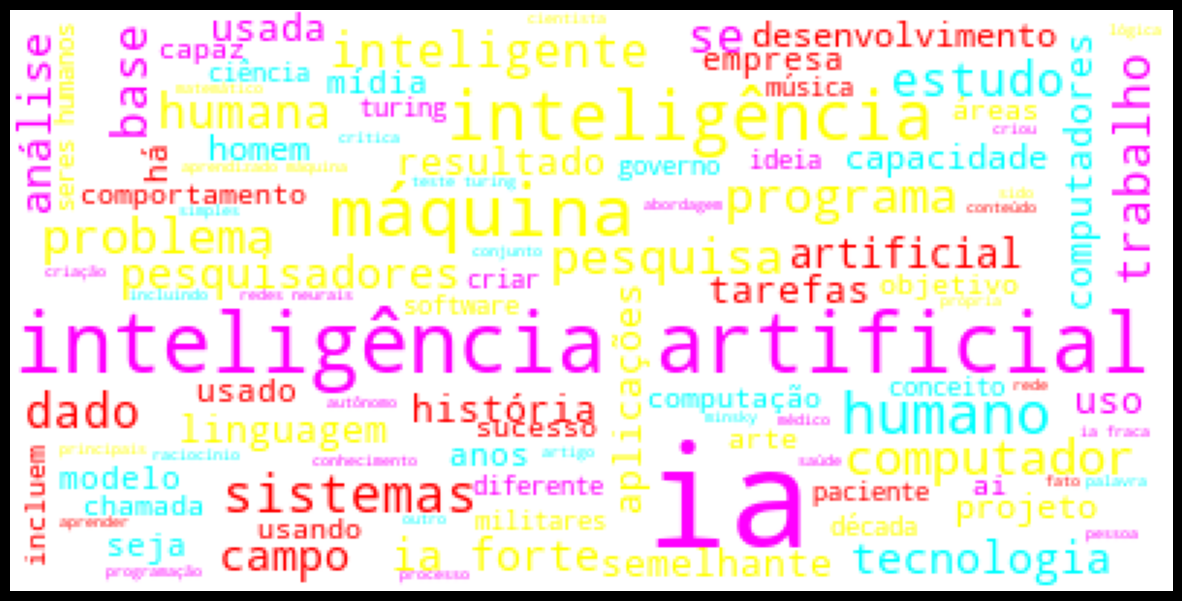

In [26]:
# configurando as cores
color_map = ListedColormap(['cyan', 'yellow', 'red', 'magenta'])
# configurando a nuvem
cloud = WordCloud(background_color='white', max_words=100, colormap=color_map)
# Visualizando
cloud = cloud.generate(' '.join(sem_stop))
plt.figure(figsize=(15, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()